## **Data Science Assignment**

**Objective:**
Analyze how trading behavior (profitability, risk, volume, leverage) aligns or diverges from
overall market sentiment (fear vs greed). Identify hidden trends or signals that could influence
smarter trading strategies.

## ***Know Your Data***

#### **Import Libraries**

In [339]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
import os

warnings.filterwarnings("ignore")

#### **Load Data**

In [340]:
df1 = pd.read_csv('csv_files/fear_greed_index.csv')
df2 = pd.read_csv('csv_files/historical_data.csv')

In [341]:
df1.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [342]:
df1.tail()

,timestamp,value,classification,date
2639,1745818200,54,Neutral,2025-04-28
2640,1745904600,60,Greed,2025-04-29
2641,1745991000,56,Greed,2025-04-30
2642,1746077400,53,Neutral,2025-05-01
2643,1746163800,67,Greed,2025-05-02


In [343]:
df2.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [344]:
df2.tail()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,382.2,420.80,SELL,25-04-2025 15:35,7546.6,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,1.750000e+12
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,2124.1,2338.63,SELL,25-04-2025 15:35,7164.4,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,1.750000e+12
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,423.4,466.16,SELL,25-04-2025 15:35,5040.3,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,1.750000e+12
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,3599.8,3963.38,SELL,25-04-2025 15:35,4616.9,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,1.750000e+12
211223,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,1017.1,1119.83,SELL,25-04-2025 15:35,1017.1,Close Long,-53.9063,0xac77fab973c455d77a670422374d9602039800f1f78c...,88803313862,False,0.111982,3.270000e+14,1.750000e+12


#### **Bitcoin Market Sentiment Dataset**

In [345]:
print("Shape of Bitcoin Market Sentiment Dataset:", df1.shape)

Shape of Bitcoin Market Sentiment Dataset: (2644, 4)


In [346]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [347]:
print("Columns of Datset:",list(df1.columns))

Columns of Datset: ['timestamp', 'value', 'classification', 'date']


In [348]:
df1.describe()

,timestamp,value
count,2.644000e+03,2644.000000
mean,1.631899e+09,46.981089
std,6.597967e+07,21.827680
min,1.517463e+09,5.000000
25%,1.574811e+09,28.000000
50%,1.631900e+09,46.000000
75%,1.688989e+09,66.000000
max,1.746164e+09,95.000000


In [349]:
df1.describe(include=['object'])

,classification,date
count,2644,2644
unique,5,2644
top,Fear,2025-05-02
freq,781,1


In [350]:
df1.duplicated().sum()

np.int64(0)

In [351]:
df1.isnull().sum()

timestamp         0
value             0
classification    0
date              0
dtype: int64

In [352]:
classification_elemnets = list(df1['classification'].unique())
print("Unique classification values:", classification_elemnets)

Unique classification values: ['Fear', 'Extreme Fear', 'Neutral', 'Greed', 'Extreme Greed']


#### **Dataset 1: Bitcoin Market Sentiment Dataset(`fear_greed_index.csv`)**

##### 📋 Basic Information
- **Total Records:** 2,644 rows
- **Columns:** 4
- **Granularity:** Daily data (one record per day)


##### 🔍 Column Details

| Column Name | Data Type | Description | Example Values |
|-------------|-----------|-------------|----------------|
| `timestamp` | Integer | Unix timestamp (seconds since epoch) | 1733961600 |
| `value` | Integer | Fear/Greed score (0-100) | 75 |
| `classification` | String | Sentiment category | "Extreme Fear", "Fear", "Neutral", "Greed", "Extreme Greed" |
| `date` | String | Human-readable date | "2024-12-12" |

##### 📈 Classification unique values
- Extreme Fear 😱
- Fear 😰
- Neutral 😐
- Greed 😊
- Extreme Greed 🤑

##### 🎯 Purpose
This dataset represents **overall market sentiment** for Bitcoin. It's an aggregate indicator that tells us how the broader market "feels" on any given day.

#### **Historical Trader Data from Hyperliquid**

In [353]:
print("Shape of Historical Trader Data from Hyperliquid:", df2.shape)

Shape of Historical Trader Data from Hyperliquid: (211224, 16)


In [354]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [355]:
print("Columns of Datset:",list(df2.columns))

Columns of Datset: ['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp']


In [356]:
df2.describe()

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Order ID,Fee,Trade ID,Timestamp
count,211224.000000,2.112240e+05,2.112240e+05,2.112240e+05,211224.000000,2.112240e+05,211224.000000,2.112240e+05,2.112240e+05
mean,11414.723350,4.623365e+03,5.639451e+03,-2.994625e+04,48.749001,6.965388e+10,1.163967,5.628549e+14,1.737744e+12
std,29447.654868,1.042729e+05,3.657514e+04,6.738074e+05,919.164828,1.835753e+10,6.758854,3.257565e+14,8.689920e+09
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12
25%,4.854700,2.940000e+00,1.937900e+02,-3.762311e+02,0.000000,5.983853e+10,0.016121,2.810000e+14,1.740000e+12
50%,18.280000,3.200000e+01,5.970450e+02,8.472793e+01,0.000000,7.442939e+10,0.089578,5.620000e+14,1.740000e+12
75%,101.580000,1.879025e+02,2.058960e+03,9.337278e+03,5.792797,8.335543e+10,0.393811,8.460000e+14,1.740000e+12
max,109004.000000,1.582244e+07,3.921431e+06,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,1.750000e+12


In [357]:
df2.describe(include=['object'])

,Account,Coin,Side,Timestamp IST,Direction,Transaction Hash
count,211224,211224,211224,211224,211224,211224
unique,32,246,2,27977,12,101184
top,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,HYPE,SELL,14-02-2025 00:31,Open Long,0x00000000000000000000000000000000000000000000...
freq,40184,68005,108528,441,49895,9032


In [358]:
df2.duplicated().sum()

np.int64(0)

In [359]:
df2.isnull().sum()

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

#### **Dataset 2: Hyperliquid Trading Data (`historical_data.csv`)**

##### 📋 Basic Information
- **Total Records:** 211,224 rows (105,612 × 2 files)
- **Columns:** 16
- **Granularity:** Individual trade-level data (each row = one trade)

##### 🔍 Column Details

| Column Name | Data Type | Description | Example Values |
|-------------|-----------|-------------|----------------|
| `Account` | String | Unique trader wallet address | "0x1234...abcd" |
| `Coin` | String | Cryptocurrency symbol being traded | "BTC", "ETH", "SOL" |
| `Execution Price` | Float | Price at which trade executed | 43250.50 |
| `Size Tokens` | Float | Number of tokens traded | 0.5 |
| `Size USD` | Float | Dollar value of the trade | 21625.25 |
| `Side` | String | Buy or Sell | "Buy", "Sell" |
| `Timestamp IST` | String | Human-readable timestamp (IST timezone) | "2024-01-15 14:30:22" |
| `Start Position` | Float | Position size before this trade | 1.2 |
| `Direction` | String | Trade direction/type | "Open", "Close" |
| `Closed PnL` | Float | Profit/Loss realized from trade | 150.75, -45.20 |
| `Transaction Hash` | String | Blockchain transaction identifier | "0xabc123..." |
| `Order ID` | Integer | Unique order identifier | 123456 |
| `Crossed` | Boolean | Whether order crossed the spread | True/False |
| `Fee` | Float | Trading fee charged | 2.50 |
| `Trade ID` | Float | Unique trade identifier | 789012.0 |
| `Timestamp` | Float | Unix timestamp | 1705318822.0 |

##### 🎯 Purpose
This dataset represents **individual trader behavior** - every single trade executed by real traders on the Hyperliquid platform. It shows us WHO traded WHAT, WHEN, and HOW they performed.

#### **Key Differences Between the Two Datasets**

##### 1️. **Granularity**
- **Fear & Greed:** Daily aggregated data (one value per day for the entire market)
- **Trader Data:** Transaction-level data (many trades per day from many traders)
##### 2️.  **Perspective**
- **Fear & Greed:** Macro view - "What is the market feeling?"
- **Trader Data:** Micro view - "What are individual traders doing?"

## ***Data Wrangling***

#### **Handling duplicates and null values**

In [360]:
df1.duplicated().sum()

np.int64(0)

In [361]:
df2.duplicated().sum()

np.int64(0)

In [362]:
df1.isnull().sum()

timestamp         0
value             0
classification    0
date              0
dtype: int64

In [363]:
df2.isnull().sum()

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

**Insights:** No Null values and Duplicates in both the datasets. 


#### **Changing Data Types**

In [364]:
##Data type of date column
df1['date'].dtype

dtype('O')

In [365]:
## Change the date column to datetime type
df1['date'] = pd.to_datetime(df1['date'])

In [366]:
df1['date'].dtype

dtype('<M8[ns]')

In [367]:
##Create a new date column for df2 which is derived from dataframe 
df2['date'] = pd.to_datetime(df2['Timestamp IST'], format='mixed', dayfirst=True).dt.date

In [368]:
df2['date'] = pd.to_datetime(df2['date'])

In [369]:
df2.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02


In [370]:
df1.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


#### **Join Data Frames Based on Date**

In [371]:
merged_df = pd.merge(df2, df1, on='date', how='left')

In [372]:
merged_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,timestamp,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed


In [373]:
# Save the merged DataFrame to a CSV file
if not os.path.exists('csv_files/merged_data.csv'):
    merged_df.to_csv('csv_files/merged_data.csv', index=False)
    print("Merged DataFrame saved as 'csv_files/merged_data.csv'")
else:
    print("File 'csv_files/merged_data.csv' already exists, not saving.")

File 'csv_files/merged_data.csv' already exists, not saving.


In [374]:
df = merged_df.copy()
df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,timestamp,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed


#### **Drop Columns**

In [375]:
df.drop(['timestamp', 'Trade ID', 'Order ID', 'Transaction Hash'], axis = 1, inplace=True)

In [376]:
df['classification'] = df['classification'].replace({'Extreme Greed': 'Greed', 'Extreme Fear': 'Fear'})

In [377]:
df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Crossed,Fee,Timestamp,date,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,True,0.345404,1.730000e+12,2024-12-02,80.0,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,True,0.005600,1.730000e+12,2024-12-02,80.0,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,True,0.050431,1.730000e+12,2024-12-02,80.0,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,True,0.050043,1.730000e+12,2024-12-02,80.0,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,True,0.003055,1.730000e+12,2024-12-02,80.0,Greed


In [378]:
def save_fig(name):
    filepath = os.path.join('outputs', name)
    if os.path.exists(filepath):
        print(f"Plot '{filepath}' already exists - skipping save")
    plt.savefig(f'outputs/{name}')
    

## ***Exploratory Data Analysis***

### **Univarient Analysis**

#### **Market Sentiment Classification**

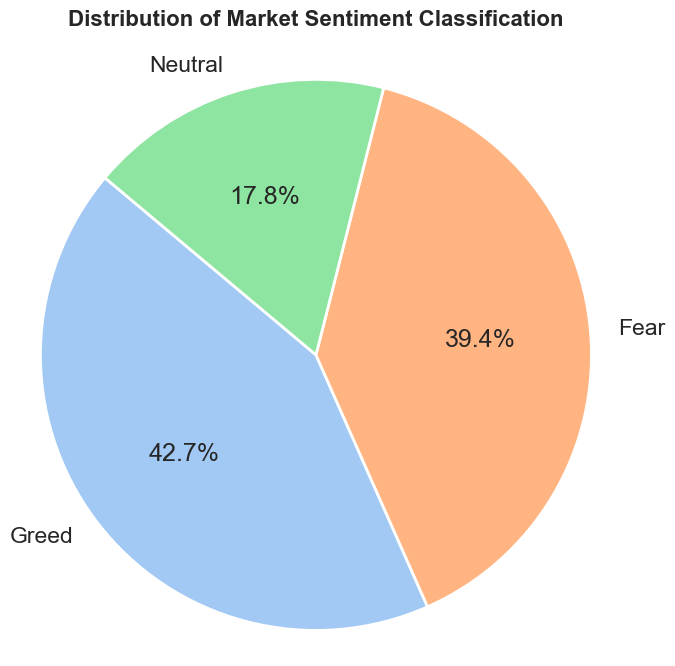

In [379]:
# Value counts
classification_counts = df['classification'].value_counts()

# Set seaborn style
sns.set_style("white")
sns.set_context("talk")

# Choose a color palette
colors = sns.color_palette("pastel", len(classification_counts))

plt.figure(figsize=(7, 7))

plt.pie(
    classification_counts,
    labels=classification_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}
)

plt.title(
    "Distribution of Market Sentiment Classification",
    fontsize=16,
    fontweight='bold',
    pad=20
)

plt.axis('equal')  # Makes the pie a circle
plt.tight_layout()
save_fig('distribution_of_sentiment.png')
plt.show()

#### **Top most Traded Coins**

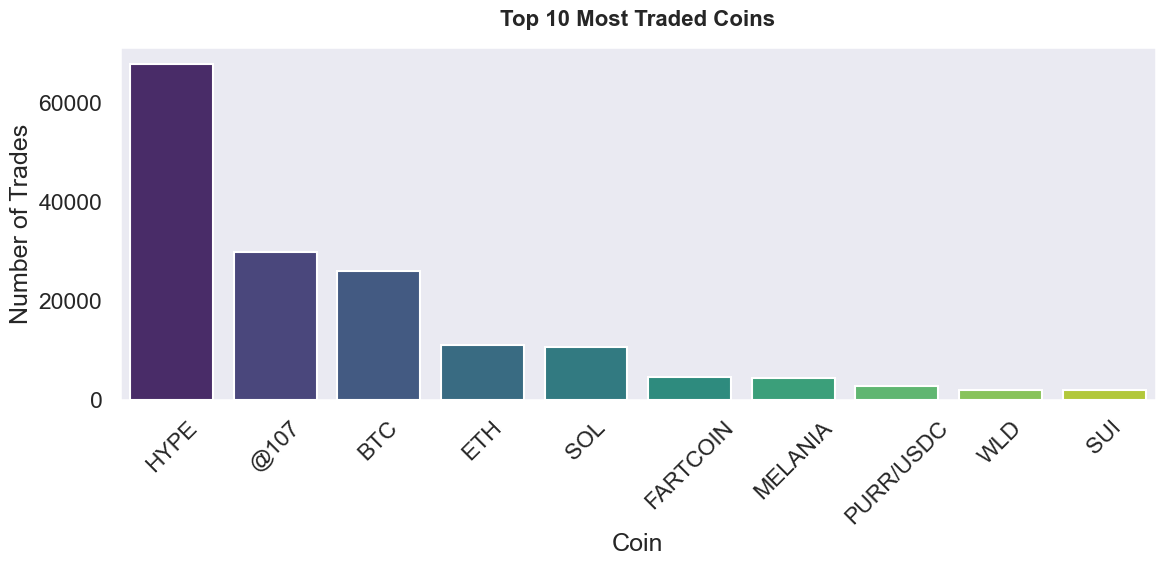

In [380]:
# Get top 10 coins
top_coins = df['Coin'].value_counts().head(10)

# Reset index for seaborn
top_coins_df = top_coins.reset_index()
top_coins_df.columns = ['Coin', 'Trades']

# Seaborn styling
sns.set_style("dark")
sns.set_context("talk")

plt.figure(figsize=(12, 6))

sns.barplot(
    data=top_coins_df,
    x='Coin',
    y='Trades',
    palette='viridis'
)

plt.title(
    "Top 10 Most Traded Coins",
    fontsize=16,
    fontweight='bold',
    pad=15
)

plt.xlabel("Coin")
plt.ylabel("Number of Trades")
plt.xticks(rotation=45)
plt.tight_layout()
save_fig("top_10_most_traded_coins.png")
plt.show()

#### **Distribution of Execution Price, Size Token and Size USD**

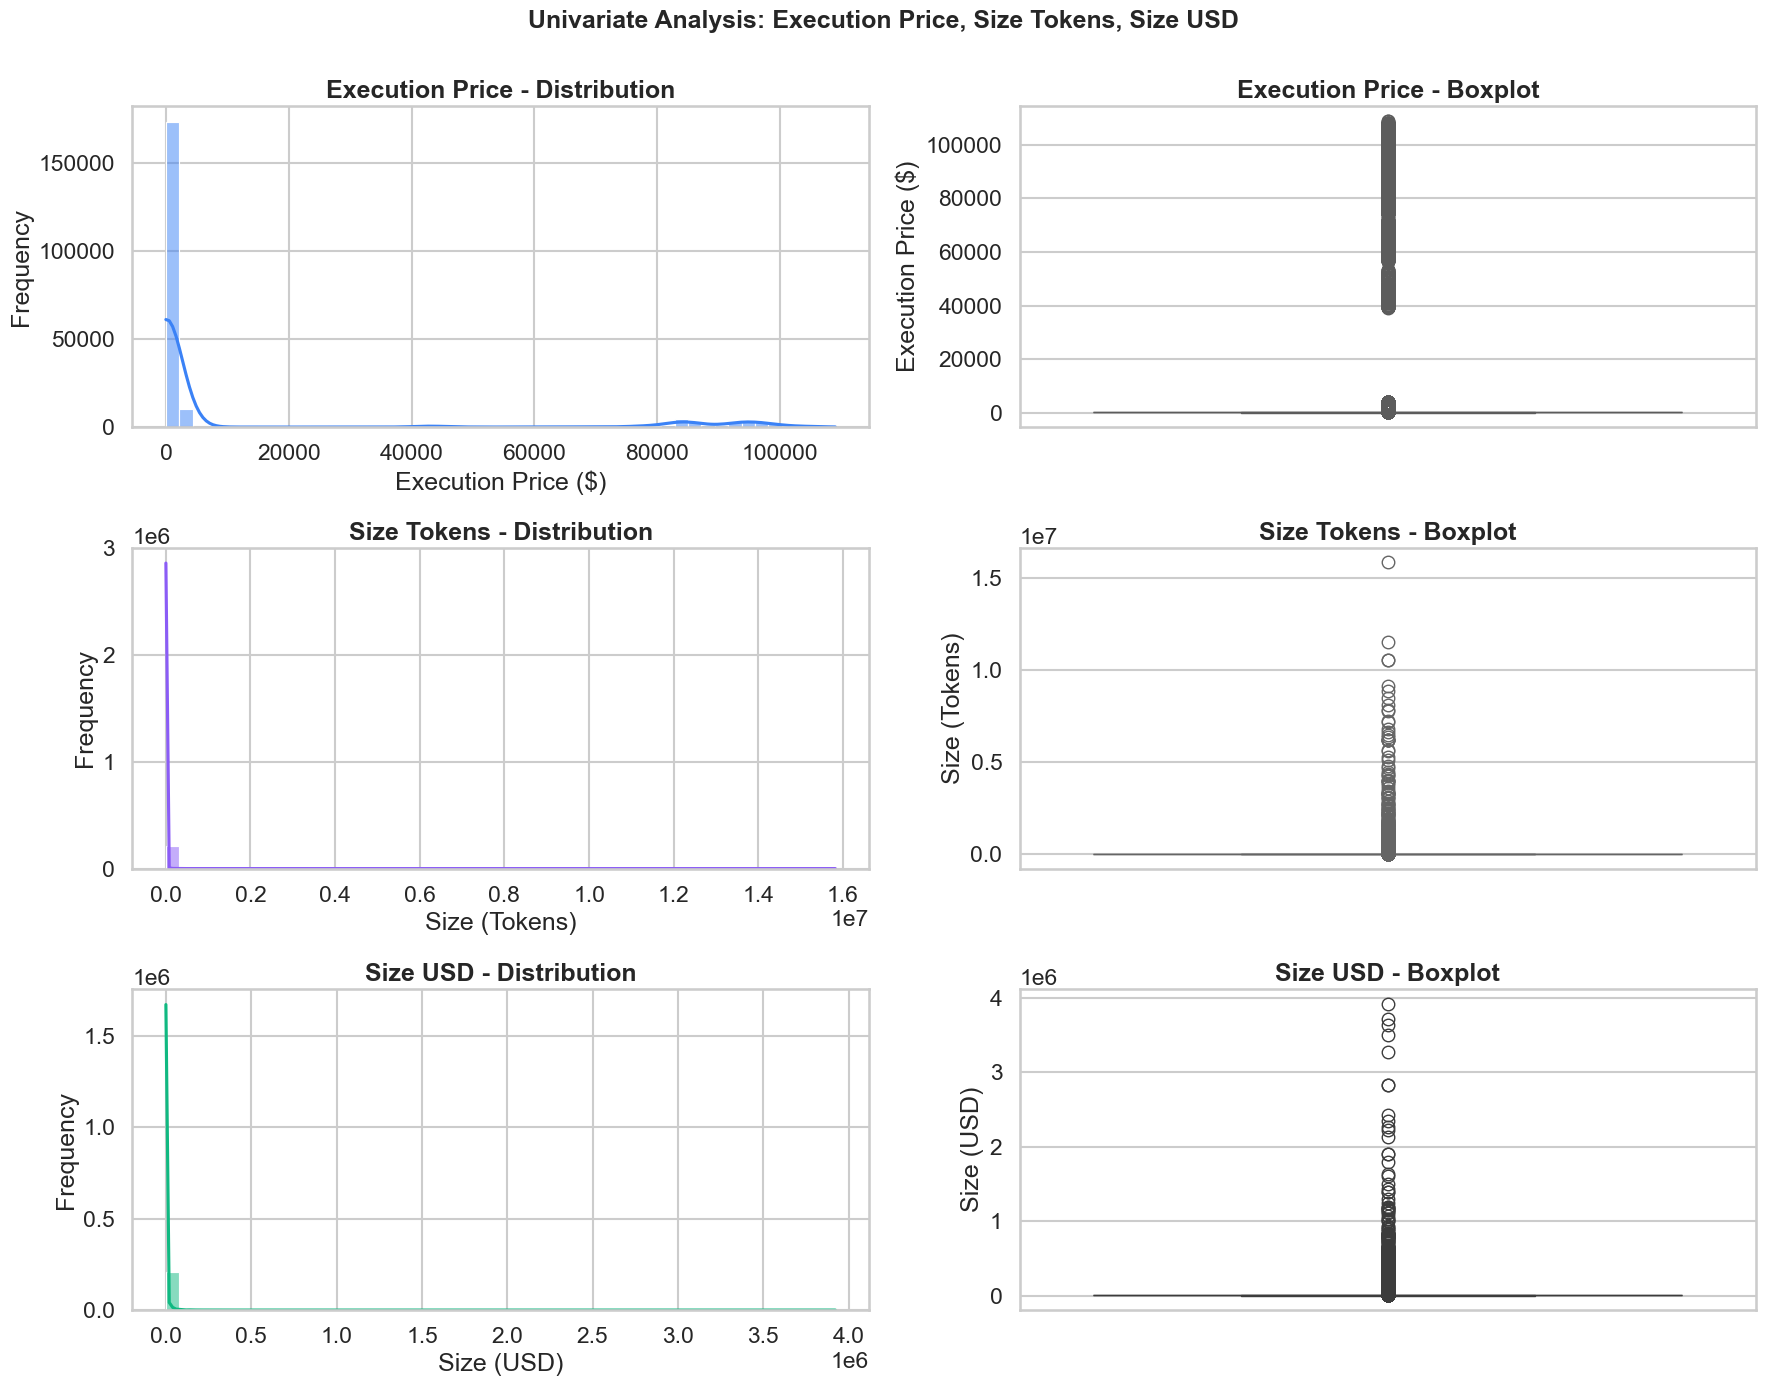

In [381]:
# Set style
sns.set_style("whitegrid")
sns.set_palette("husl")

# Create figure with subplots
fig, axes = plt.subplots(3, 2, figsize=(18, 14))
fig.suptitle('Univariate Analysis: Execution Price, Size Tokens, Size USD', 
             fontsize=18, fontweight='bold', y=0.995)

#EXECUTION PRICE
# 1. Histogram
sns.histplot(df['Execution Price'].dropna(), bins=50, kde=True, ax=axes[0,0], color='#3b82f6')
axes[0,0].set_title('Execution Price - Distribution', fontweight='bold')
axes[0,0].set_xlabel('Execution Price ($)')
axes[0,0].set_ylabel('Frequency')

# 2. Box Plot
sns.boxplot(y=df['Execution Price'].dropna(), ax=axes[0,1], color='#3b82f6')
axes[0,1].set_title('Execution Price - Boxplot', fontweight='bold')
axes[0,1].set_ylabel('Execution Price ($)')


#SIZE TOKENS 
# 1. Histogram
sns.histplot(df['Size Tokens'].dropna(), bins=50, kde=True, ax=axes[1,0], color='#8b5cf6')
axes[1,0].set_title('Size Tokens - Distribution', fontweight='bold')
axes[1,0].set_xlabel('Size (Tokens)')
axes[1,0].set_ylabel('Frequency')

# 2. Box Plot
sns.boxplot(y=df['Size Tokens'].dropna(), ax=axes[1,1], color='#8b5cf6')
axes[1,1].set_title('Size Tokens - Boxplot', fontweight='bold')
axes[1,1].set_ylabel('Size (Tokens)')



# SIZE USD 
# 1. Histogram
sns.histplot(df['Size USD'].dropna(), bins=50, kde=True, ax=axes[2,0], color='#10b981')
axes[2,0].set_title('Size USD - Distribution', fontweight='bold')
axes[2,0].set_xlabel('Size (USD)')
axes[2,0].set_ylabel('Frequency')

# 2. Box Plot
sns.boxplot(y=df['Size USD'].dropna(), ax=axes[2,1], color='#10b981')
axes[2,1].set_title('Size USD - Boxplot', fontweight='bold')
axes[2,1].set_ylabel('Size (USD)')



plt.tight_layout()
save_fig("distribution_trade_size.png")
plt.show()

**Insights**
- As three columns  are related to each other their distribution are similar to each other.
- Heavily right-skewed - most trades are small quantities.
- Wide range of trade size.
- Many outlier which are real not anamolies.

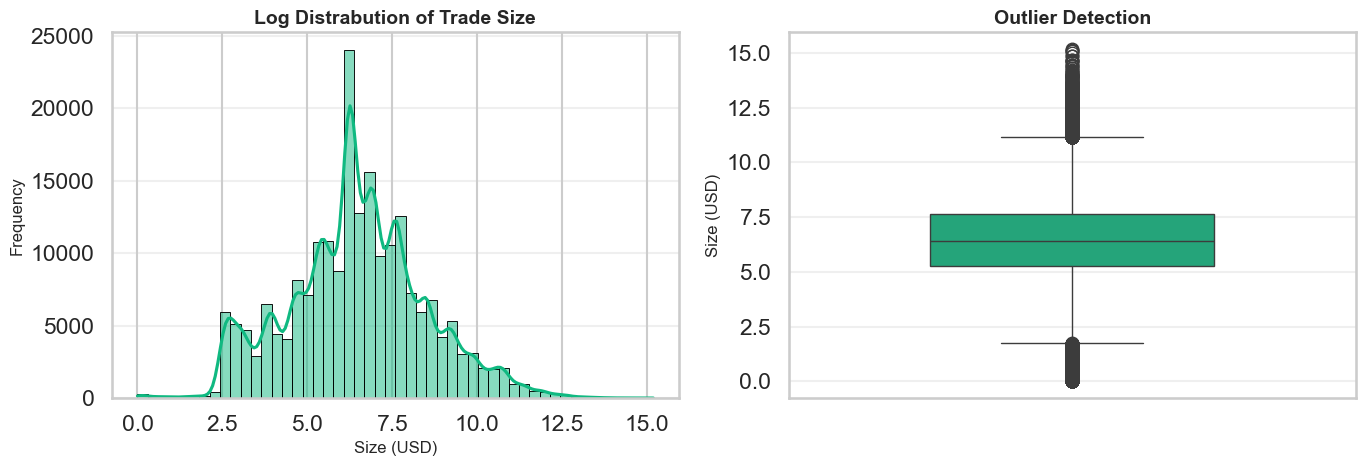

In [382]:
log_size_usd = np.log1p(df['Size USD'])
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.histplot(log_size_usd, bins=50, kde=True, color='#10b981', edgecolor='black')
plt.title('Log Distrabution of Trade Size', fontsize=14, fontweight='bold')
plt.xlabel('Size (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 2, 2)
sns.boxplot(y=log_size_usd, color='#10b981', width=0.5)
plt.title('Outlier Detection', fontsize=14, fontweight='bold')
plt.ylabel('Size (USD)', fontsize=12)
plt.grid(axis='y', alpha=0.3)


plt.tight_layout()
save_fig("log_tradesize_distribution.png")
plt.show()

In [383]:
x = round(np.expm1(6), 1)
print("Most frequent Trade: ",x,"$")

y = round(np.expm1(5), 1)
z = round(np.expm1(7.5), 1)

print(f"Common Trade size is between {y}$ and {z}$")

Most frequent Trade:  402.4 $
Common Trade size is between 147.4$ and 1807.0$


**Insights**
- Now, It's much better distrabution and looks like approximately normal (bell-shaped curve)
- Central Tendency - Peak around Log(6) = e ^(6) = 402$
- Most of the trade between log(5) and log(7.5) = 147$ and 1807$
- Small outliers (log 2.5) = Trades under $12
- Large outliers (log 11) = Trades over $60,000

#### **Profit and Loss Distribution**

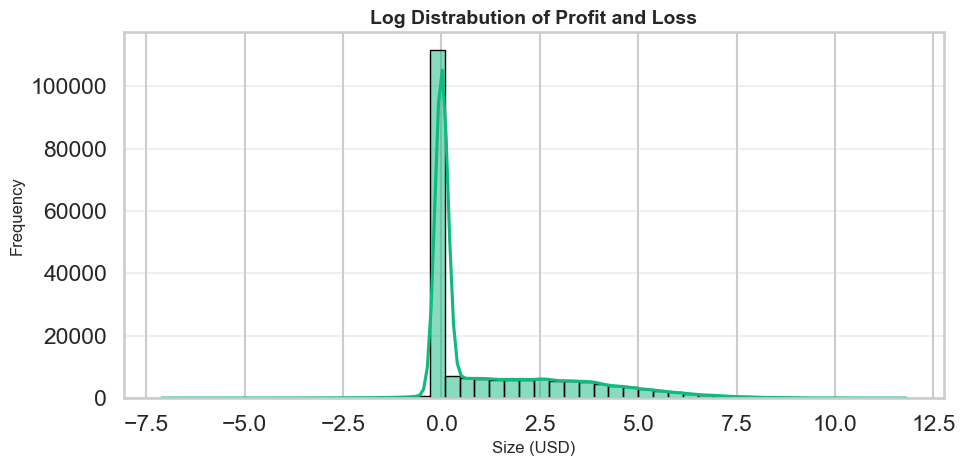

In [384]:
pnl_log = np.log1p(df['Closed PnL'])
plt.figure(figsize=(10, 5))


sns.histplot(pnl_log, bins=50, kde=True, color='#10b981', edgecolor='black')
plt.title('Log Distrabution of Profit and Loss', fontsize=14, fontweight='bold')
plt.xlabel('Size (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
save_fig('log_dist_pnf.png')
plt.show()

In [385]:
##Create is_win column "True if they make Profit else False"
df['is_win'] = df['Closed PnL'] > 0

In [386]:
# Count True and False
win_loss_count = df['is_win'].value_counts()
print(win_loss_count)


is_win
False    124355
True      86869
Name: count, dtype: int64


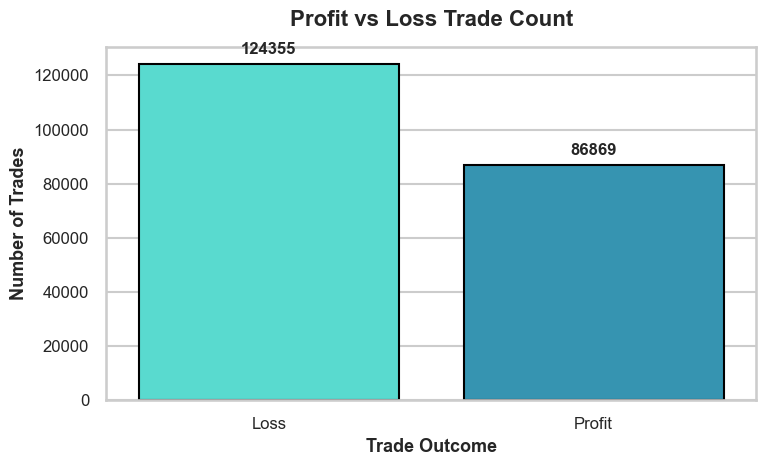

In [387]:
# Set seaborn style
sns.set_style("whitegrid")

plt.figure(figsize=(8, 5))

ax = sns.barplot(
    x=win_loss_count.index.astype(str),
    y=win_loss_count.values,
    palette=["#44efe1", "#229fc5"],
    edgecolor='black',
    linewidth=1.5
)

# Titles & labels
plt.title('Profit vs Loss Trade Count', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Trade Outcome', fontsize=13, fontweight='bold')
plt.ylabel('Number of Trades', fontsize=13, fontweight='bold')

# Custom x-ticks
plt.xticks(
    ticks=[0, 1],
    labels=['Loss', 'Profit'],
    fontsize=12
)
plt.yticks(fontsize=12)

# Add value labels on bars
for container in ax.containers:
    ax.bar_label(container, padding=5, fontsize=12, fontweight='bold')

plt.tight_layout()
save_fig("profit_loss_count.png")
plt.show()


**Insights**
- From distribution we all think there are more profit than loss.
- most of the points near zero and small negative numbers.
- if we create new row 'is_win' column which tells wheater user make profit or loss in that particular trade.
- from second graph(Profit vs loss) there are lot more loss than Profit.
- from the both graphs we can infer that
- Massive spike at 0 is due to small profits AND small losses.
- Long right tail is because occasional big wins.

#### **Position Type Distribution**

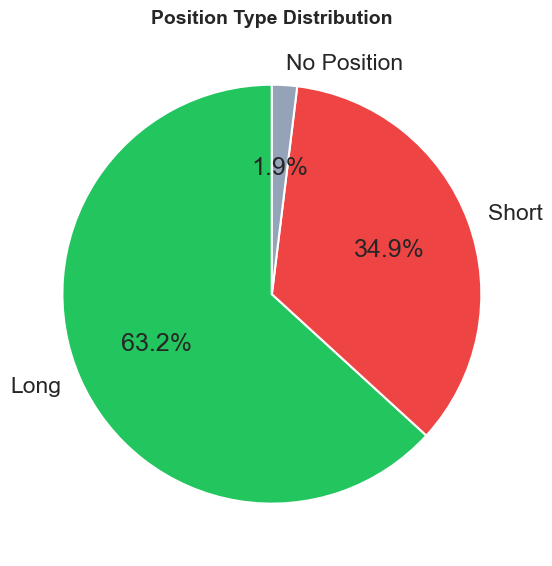

In [388]:
# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))

# Position Type Distribution (Long/Short/None)
position_type = []
for pos in df['Start Position'].dropna():
    if pos > 0:
        position_type.append('Long')
    elif pos < 0:
        position_type.append('Short')
    else:
        position_type.append('No Position')

position_counts = pd.Series(position_type).value_counts()

plt.pie(position_counts, labels=position_counts.index, autopct='%1.1f%%', 
              colors=['#22c55e', '#ef4444', '#94a3b8'], startangle=90)
plt.title('Position Type Distribution', fontweight='bold', fontsize=14)

plt.tight_layout()
save_fig("position_type_dist.png")
plt.show()

**Trading Types:**
- LONG Position (Positive) - You own the coin.
- SHORT Position (Negataive) -You borrowed/sold the coin you don't own.


#### **Trading Style Distrabution**

In [389]:
df['Direction'].value_counts()

Direction
Open Long                    49895
Close Long                   48678
Open Short                   39741
Close Short                  36013
Sell                         19902
Buy                          16716
Spot Dust Conversion           142
Short > Long                    70
Long > Short                    57
Auto-Deleveraging                8
Liquidated Isolated Short        1
Settlement                       1
Name: count, dtype: int64

In [390]:
#Those who simply buy or sell called spot traders
spot_directions = ['Buy', 'Sell']

##Those who place trade on postion of price caleed derative traders
derivatives_directions = [
    'Open Long', 'Close Long',
    'Open Short', 'Close Short',
    'Long > Short', 'Short > Long'
]

df['trading_style'] = 'Others'

df.loc[df['Direction'].isin(spot_directions), 'trading_style'] = 'Spot Trading'
df.loc[df['Direction'].isin(derivatives_directions), 'trading_style'] = 'Derivatives Trading'


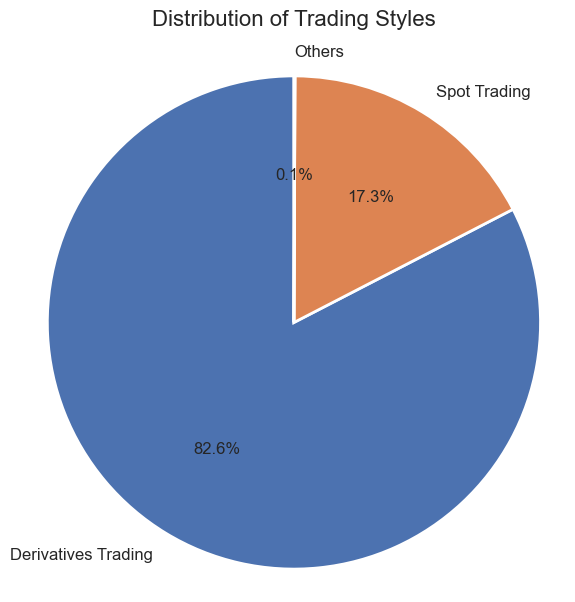

In [391]:
# Apply a nice seaborn theme
sns.set_theme(
    style="white",
    context="talk"   
)

# Count values
counts = df['trading_style'].value_counts()

# Create pie chart
plt.figure(figsize=(7, 7))
plt.pie(
    counts,
    labels=counts.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'white', 'linewidth': 2},
    textprops={'fontsize': 12}
)

plt.title('Distribution of Trading Styles', fontsize=16, pad=20)
plt.axis('equal')  # Keep it circular

save_fig("trading_style.png")
plt.show()


### **Bivarient Analysis**

#### **Trading Frequency**

In [392]:
# Overall Trading Frequency
total_trades = len(df)
date_range = (df['date'].max() - df['date'].min()).days
trades_per_day = total_trades / date_range


print(f"Total Trades: {total_trades:,}")
print(f"Date Range: {date_range:.1f} days")
print(f"Average Trades per Day: {trades_per_day:.2f}")
print()

Total Trades: 211,224
Date Range: 731.0 days
Average Trades per Day: 288.95



In [393]:
# Trades per Day (Time Series) 
daily_trades = df.groupby('date').size().reset_index(name='trade_count')
daily_trades['date'] = pd.to_datetime(daily_trades['date'])

In [394]:
print(f"Average Daily Trades: {daily_trades['trade_count'].mean():.2f}")
print(f"Median Daily Trades: {daily_trades['trade_count'].median():.0f}")
print(f"Max Trades in a Day: {daily_trades['trade_count'].max():,}")
print(f"Min Trades in a Day: {daily_trades['trade_count'].min()}")
print()

Average Daily Trades: 440.05
Median Daily Trades: 68
Max Trades in a Day: 6,246
Min Trades in a Day: 1



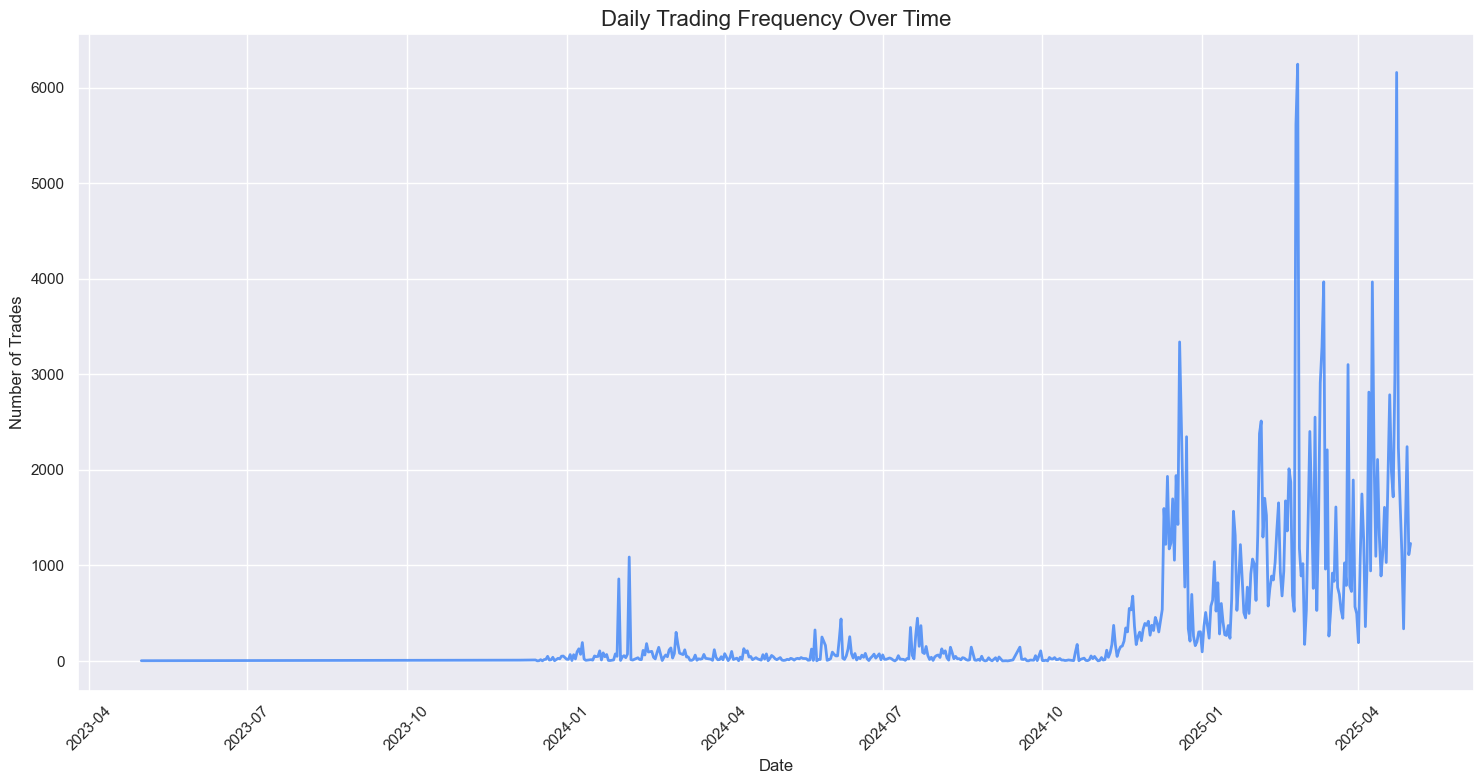

In [395]:
# Set seaborn theme (same as your style)
sns.set_theme(style="darkgrid")

plt.figure(figsize=(15, 8))

sns.lineplot(
    data=daily_trades,
    x='date',
    y='trade_count',
    linewidth=2,
    alpha=0.8,
    color='#3b82f6'
)

plt.title('Daily Trading Frequency Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Trades', fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout()

save_fig("daily_trading_frequency.png")
plt.show()



In [396]:
# Trading Frequency by Trader
trader_freq = df.groupby('Account').agg({
    'Closed PnL': 'count',
    'date': lambda x: (x.max() - x.min()).days  # active days
})
trader_freq.columns = ['Total_Trades', 'Active_Days']
trader_freq['Trades_per_Day'] = trader_freq['Total_Trades'] / trader_freq['Active_Days']

print("Trader Frequency Statistics:")
print(trader_freq['Trades_per_Day'].describe())

Trader Frequency Statistics:
count     32.000000
mean      40.921956
std       58.294728
min        1.124138
25%        7.055242
50%       19.936930
75%       44.768145
max      279.055556
Name: Trades_per_Day, dtype: float64


#### **BUY and SELL count by Sentiment**

In [397]:
buys_sells = df.groupby(['classification', 'Side']).size().reset_index(name='count')
buys_sells

,classification,Side,count
0,Fear,BUY,41205
1,Fear,SELL,42032
2,Greed,BUY,42516
3,Greed,SELL,47779
4,Neutral,BUY,18969
5,Neutral,SELL,18717


In [398]:
buys_sells_pivot = buys_sells.pivot(index='classification', columns='Side', values='count')
buys_sells_pivot

Side,BUY,SELL
classification,,
Fear,41205,42032
Greed,42516,47779
Neutral,18969,18717


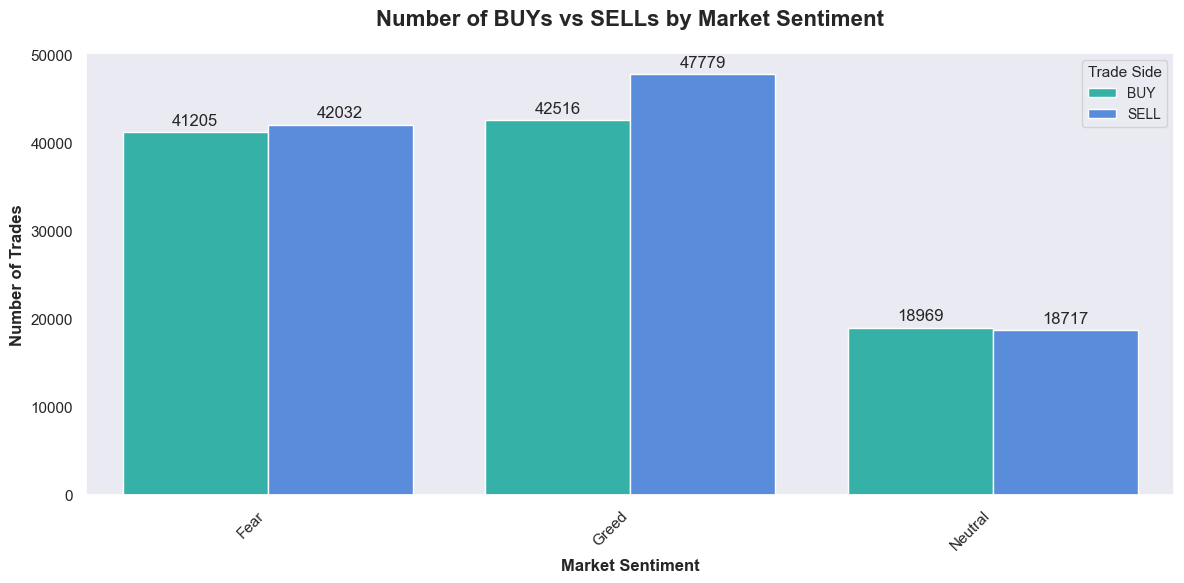

In [399]:
sns.set_style("dark")
plt.figure(figsize=(12, 6))

# Create grouped bar chart
ax = sns.barplot(data=buys_sells, x='classification', y='count', hue='Side', palette=["#22c5ba", "#4488ef"])

# Customize
plt.title('Number of BUYs vs SELLs by Market Sentiment', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Market Sentiment', fontsize=12, fontweight='bold')
plt.ylabel('Number of Trades', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Trade Side', fontsize=10, title_fontsize=11)

# Add value labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3)

plt.tight_layout()
save_fig("side_by_sentiment.png")
plt.show()

**Insights:**
- Almost every emotion has similar number of buys and number of sells
- I thought and many people has a misconception that during greed there will be more buys and during fear there will be more sells.


### **Profitability Analysis - How does profitability align/diverge with sentiment?**

**Q1: Are traders MORE profitable during Fear or Greed?**

In [400]:
sentiment_pnl = (
    df.groupby('classification')['Closed PnL']
      .agg(['mean', 'std', 'sum'])
      .reset_index()
      .sort_values(by='mean', ascending=False)
)
sentiment_pnl

,classification,mean,std,sum
1,Greed,53.882281,976.964281,4.865301e+06
0,Fear,49.212077,990.875398,4.096266e+06
2,Neutral,34.307718,517.122220,1.292921e+06


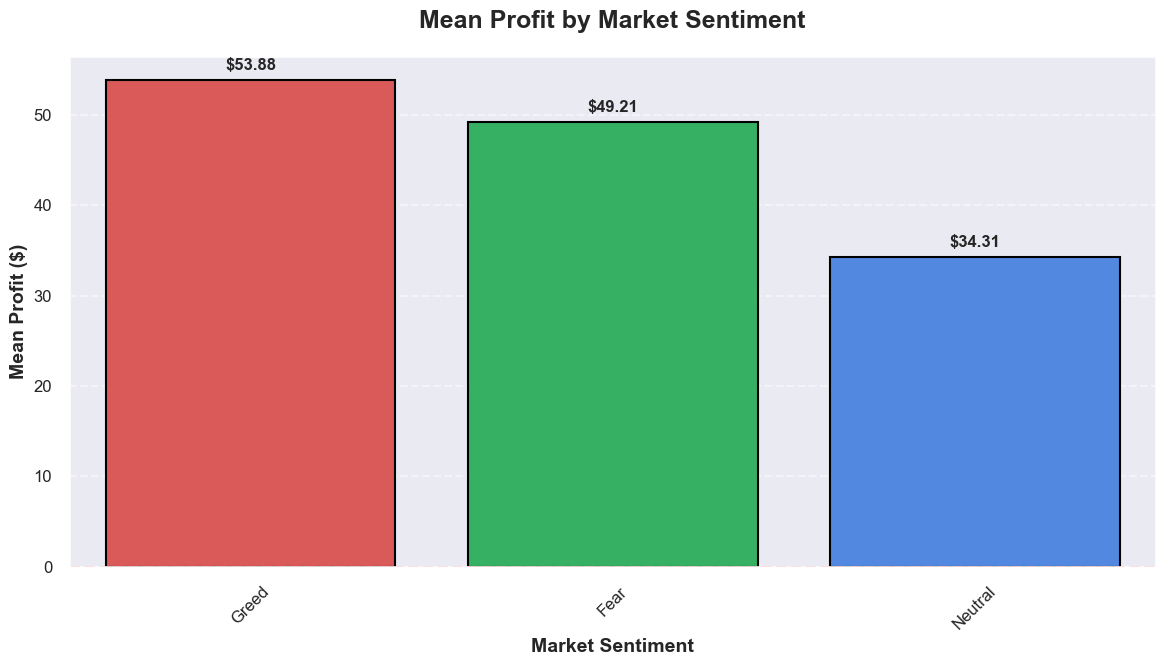

In [401]:
# Set seaborn theme
sns.set_theme(style="dark", context="talk")

plt.figure(figsize=(12, 7))

# Bar plot with custom palette
ax = sns.barplot(
    data=sentiment_pnl,
    x='classification',
    y='mean',
    palette=['#ef4444', '#22c55e', '#3b82f6'],  # Custom color palette
    edgecolor='black',
    linewidth=1.5
)

# Customize styling
plt.title('Mean Profit by Market Sentiment', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Market Sentiment', fontsize=14, fontweight='bold')
plt.ylabel('Mean Profit ($)', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Add value labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='$%.2f', padding=5, fontsize=12, fontweight='bold')

# Add baseline for profit/loss
plt.axhline(0, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Breakeven Line')


# Add grid
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Add legend if needed
# plt.legend(fontsize=11)

plt.tight_layout()
save_fig('Profit_by_sentiment.png')
plt.show()

**Insights:**
- The mean of profit is higher during greed than fear.
- During greed the mean profit is $53.8. 
- During fear the mean profit is $49.2.


**Q2: What's the win rate in each sentiment period?**

In [402]:
win_rate = (
    df.groupby('classification')['is_win']
      .mean()
      .mul(100)
      .reset_index(name='win_rate')
      .sort_values(by='win_rate', ascending=False)
)

win_rate

,classification,win_rate
1,Greed,42.031120
0,Fear,40.787150
2,Neutral,39.699093


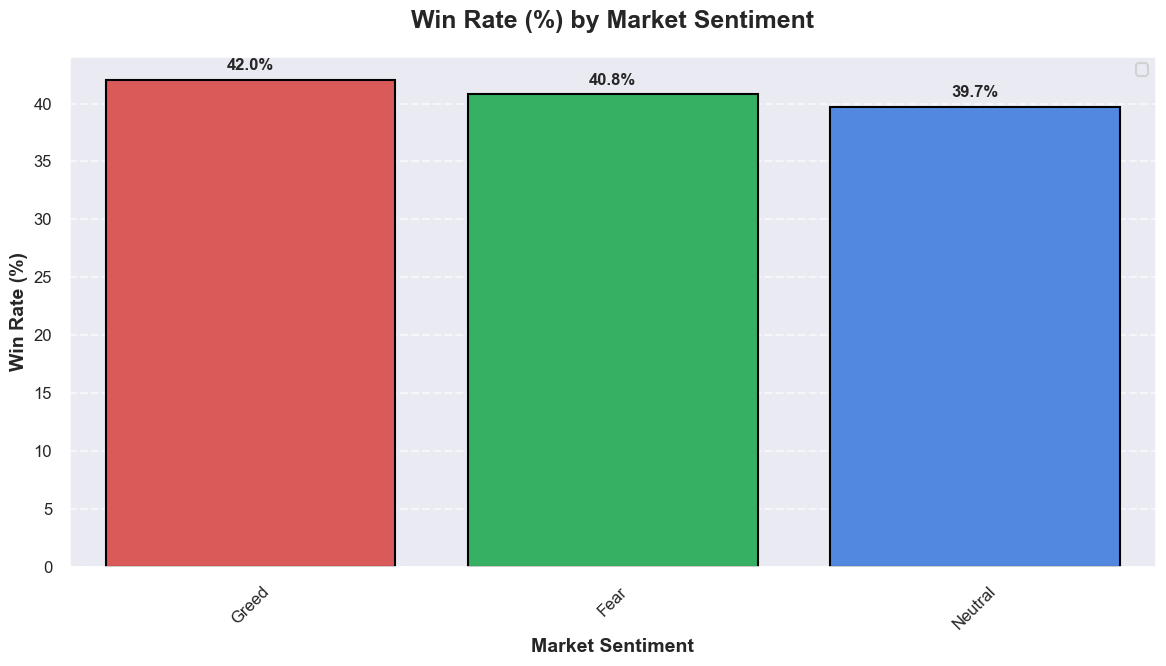

In [403]:
# Set seaborn style
sns.set_style("dark")

plt.figure(figsize=(12, 7))

# Bar plot with custom palette
ax = sns.barplot(
    data=win_rate,
    x='classification',
    y='win_rate',
    palette=['#ef4444', '#22c55e', '#3b82f6'],  # Custom color palette
    edgecolor='black',
    linewidth=1.5
)

# Customize styling
plt.title('Win Rate (%) by Market Sentiment', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Market Sentiment', fontsize=14, fontweight='bold')
plt.ylabel('Win Rate (%)', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Add value labels on bars with percentage format
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', padding=5, fontsize=12, fontweight='bold')
# Add grid style
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add legend
plt.legend(fontsize=11, loc='upper right')

plt.tight_layout()
save_fig('win_rate_by_sentiment.png')  # Save figure
plt.show()

**Insights:**
- The Win rate percentage of Greed more than Fear and supports the previous result.
- The win rate during  Greed is 42% and during Fear it is 40.7%.

**Q3: Do contrarian traders (buy during fear, sell during greed) perform better?**

In [404]:
df['is_contrarian'] = (
    ((df['classification'].isin(['Fear'])) & (df['Side'] == 'BUY')) |
      ((df['classification'].isin(['Greed'])) & (df['Side'] == 'SELL'))
)

##Compare Perforamnce
contrarian_pnl = df.groupby('is_contrarian')['Closed PnL'].mean().reset_index()
contrarian_pnl

,is_contrarian,Closed PnL
0,False,32.12000
1,True,71.59276


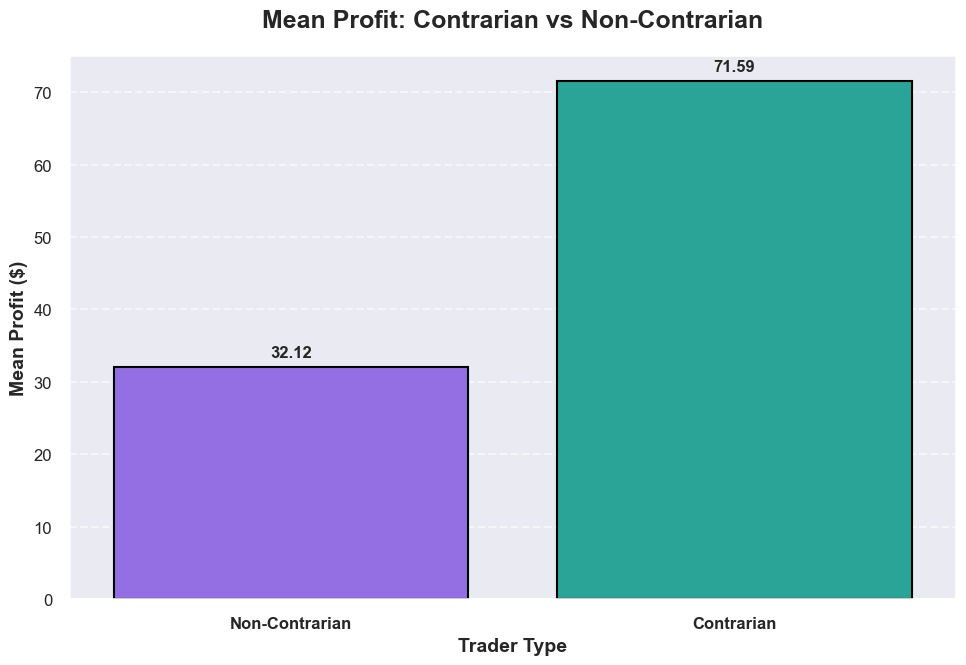

In [405]:
# Set seaborn style
sns.set_style("dark")

plt.figure(figsize=(10, 7))

# Bar plot with custom palette
ax = sns.barplot(
    data=contrarian_pnl,
    x='is_contrarian',
    y='Closed PnL',
    palette=['#8b5cf6', '#14b8a6'],  # Red for Non-Contrarian, Green for Contrarian
    edgecolor='black',
    linewidth=1.5
)

# Customize styling
plt.title('Mean Profit: Contrarian vs Non-Contrarian', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Trader Type', fontsize=14, fontweight='bold')
plt.ylabel('Mean Profit ($)', fontsize=14, fontweight='bold')

# Rename x-axis labels with proper styling
plt.xticks([0, 1], ['Non-Contrarian', 'Contrarian'], fontsize=12, fontweight='bold')
plt.yticks(fontsize=12)

# Add value labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=5, fontsize=12, fontweight='bold')

# Add grid style
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
save_fig('contrarian_vs_non_contrarian_profit.png')
plt.show()

**Insights:**
- It is clear that contrarian mean profit is more than non-contrarian.
- The mean profit of contrarian trader is $71.5 and for non-contrarian is $32.1.


### **Risk Ananlysis - How does trading risk align/diverge with sentiment?**

**Q1: Is Profit more volatile (risky) during certain sentiments?**

In [406]:
##Standard Deviation = risk measure
risk_by_sentiment = df.groupby('classification')['Closed PnL'].std().reset_index()
risk_by_sentiment


,classification,Closed PnL
0,Fear,990.875398
1,Greed,976.964281
2,Neutral,517.122220


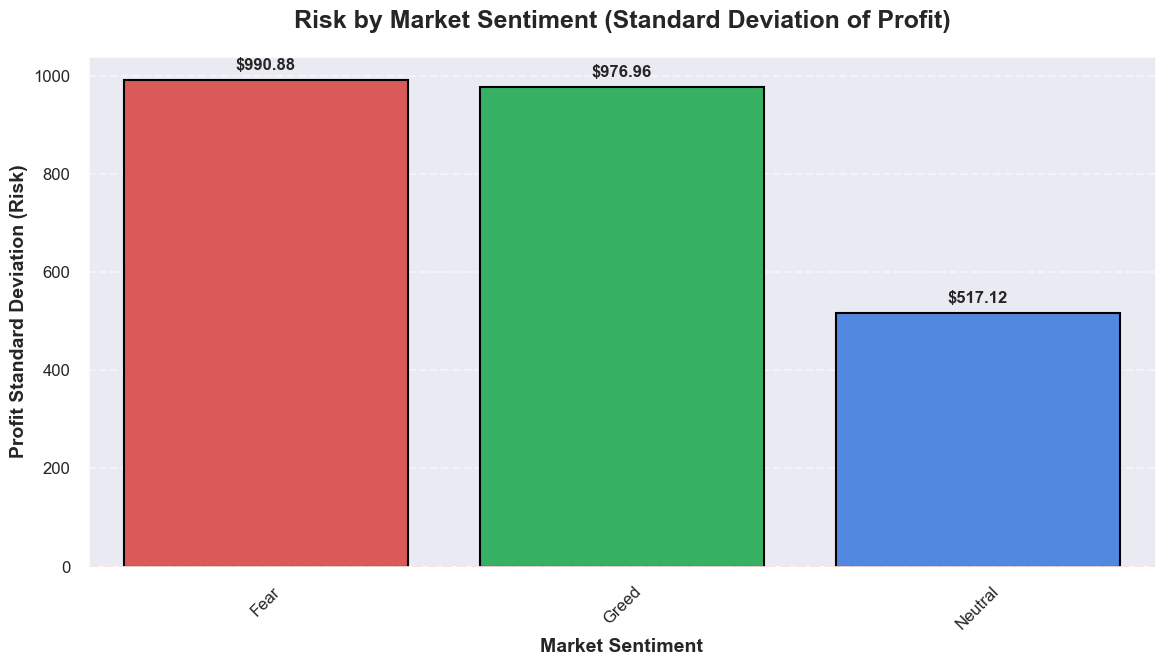

In [407]:
sns.set_style("dark")

plt.figure(figsize=(12, 7))

# Bar plot with custom palette
ax = sns.barplot(
    data=risk_by_sentiment,
    x='classification',
    y='Closed PnL',
    palette=['#ef4444', '#22c55e', '#3b82f6'],  # Custom color palette
    edgecolor='black',
    linewidth=1.5
)

# Customize styling
plt.title('Risk by Market Sentiment (Standard Deviation of Profit)', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Market Sentiment', fontsize=14, fontweight='bold')
plt.ylabel('Profit Standard Deviation (Risk)', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Add value labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='$%.2f', padding=5, fontsize=12, fontweight='bold')

# Add horizontal line (optional - you can uncomment if needed)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Zero Line')


# Add grid style
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
save_fig('risk_by_sentiment.png')  # Optional: save figure
plt.show()

**Insights:**
- Risk measured as standard deviation of profit because it is measure of how far it is from mean.
- Risk is almost similar during both fear and greed time but, it is definately  more than comapred to neutral sentiment.
- standard deviation of profit of greed and fear is $976 and $990 respectively and during neutral sentiment it is $517.



**Q2: Do traders take bigger positions during certain sentiments?**

In [408]:
#Position size risk
position_size = df.groupby('classification')['Size USD'].agg(['mean', 'median', 'max']).reset_index()
position_size


,classification,mean,median,max
0,Fear,7182.011019,749.400,3921430.72
1,Greed,4574.424490,552.200,2227114.71
2,Neutral,4782.732661,547.655,3641180.84


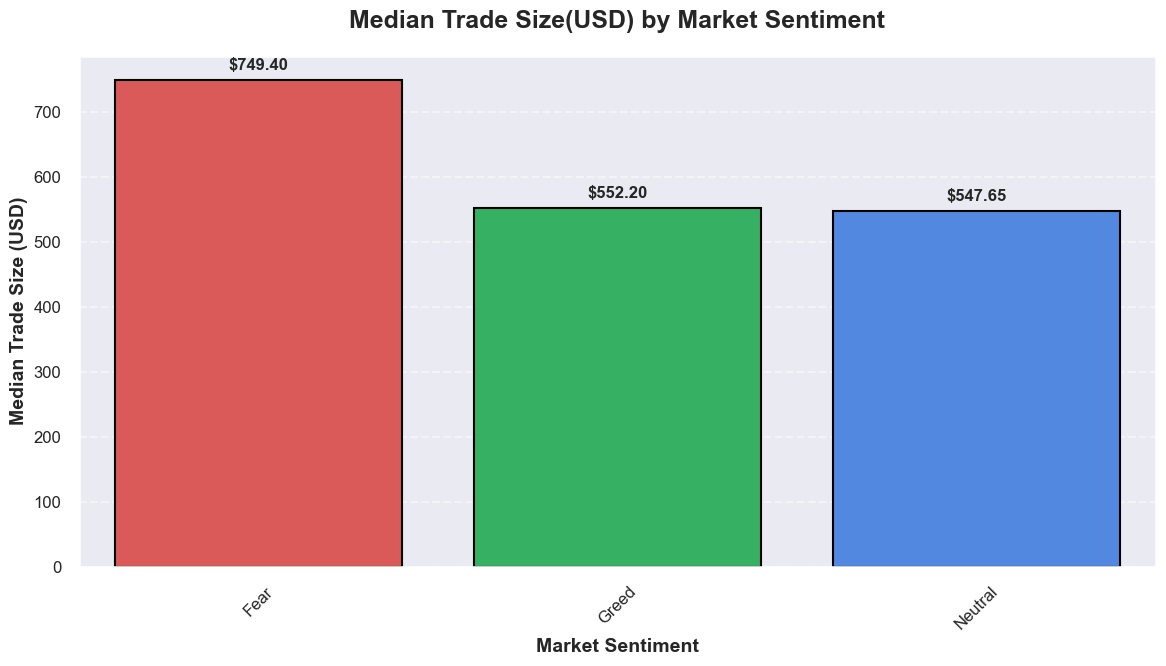

In [409]:
sns.set_style("dark")

plt.figure(figsize=(12, 7))

# Bar plot with custom palette
ax = sns.barplot(
    data=position_size,
    x='classification',
    y='median',
    palette=['#ef4444', '#22c55e', '#3b82f6'],  
    edgecolor='black',
    linewidth=1.5
)

# Customize styling
plt.title('Median Trade Size(USD) by Market Sentiment', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Market Sentiment', fontsize=14, fontweight='bold')
plt.ylabel('Median Trade Size (USD)', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Add value labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='$%.2f', padding=5, fontsize=12, fontweight='bold')


# Add grid style
plt.grid(axis='y', linestyle='--', alpha=0.5)


plt.tight_layout()
save_fig('median_trade_size.png')  
plt.show()

- Trade size(USD) is large when the market is in fear compare to greed and neutral.
- Median of Trade size(USD) during fear is $750 and for greed and neutral it is around $550.
- So, they take bigger position when market is in fear.

**Q3: Risk-Adjusted Returns (Sharpe-like ratio)**

In [410]:
# Calculate risk-adjusted performance
risk_adjusted = df.groupby('classification').apply(
 lambda x: x['Closed PnL'].mean() / x['Closed PnL'].std() if x['Closed PnL'].std() > 0 else 0
).reset_index()
risk_adjusted.columns = ['Sentiment', 'Risk_Adjusted_Return']
print("Risk-Adjusted Returns by Sentiment:")
risk_adjusted

Risk-Adjusted Returns by Sentiment:


,Sentiment,Risk_Adjusted_Return
0,Fear,0.049665
1,Greed,0.055153
2,Neutral,0.066344


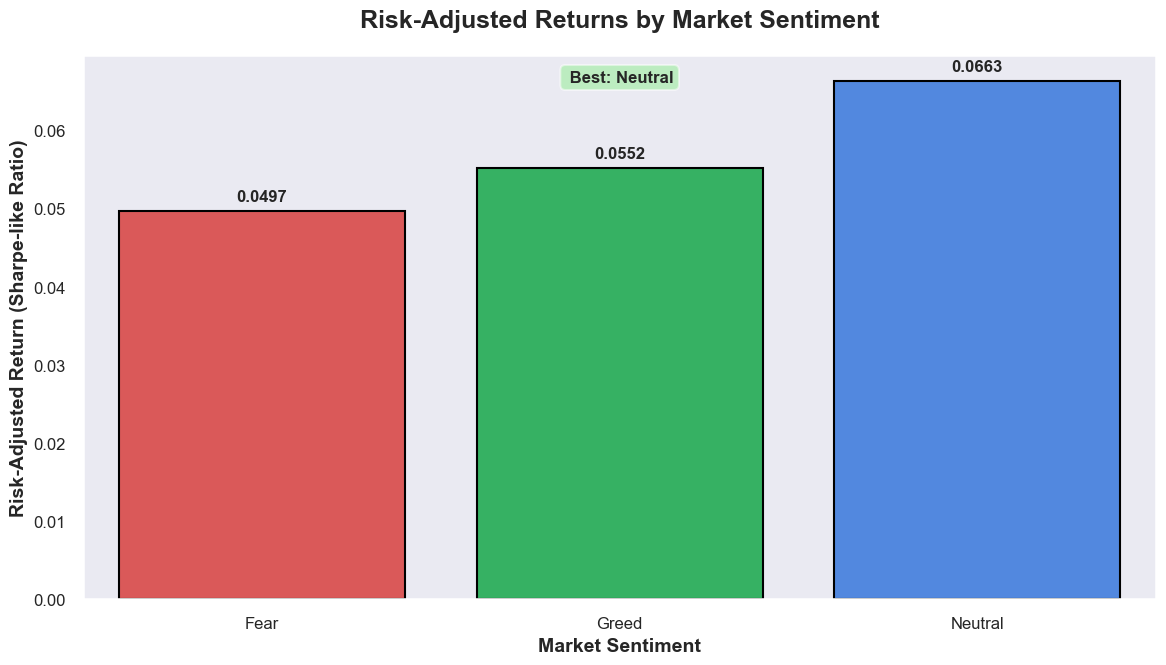

In [411]:
# Create the plot
plt.figure(figsize=(12, 7))
sns.set_style("dark")

# Bar plot
ax = sns.barplot(data=risk_adjusted, x='Sentiment', y='Risk_Adjusted_Return', 
                 palette=['#ef4444', '#22c55e', '#3b82f6'], edgecolor='black', linewidth=1.5)

# Customize
plt.title('Risk-Adjusted Returns by Market Sentiment', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Market Sentiment', fontsize=14, fontweight='bold')
plt.ylabel('Risk-Adjusted Return (Sharpe-like Ratio)', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add value labels on bars
for i, container in enumerate(ax.containers):
    ax.bar_label(container, fmt='%.4f', padding=5, fontsize=12, fontweight='bold')



# Add interpretation annotations
max_sentiment = risk_adjusted.loc[risk_adjusted['Risk_Adjusted_Return'].idxmax(), 'Sentiment']
plt.text(0.5, 0.95, f' Best: {max_sentiment}', 
         transform=ax.transAxes, fontsize=12, fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5),
         ha='center')


plt.tight_layout()
save_fig('risk_adjusted_returns.png')
plt.show()

**Insight:**
- Traders achieve the highest risk-adjusted returns (0.066) during Neutral sentiment, suggesting that calm market conditions offer superior risk-reward efficiency compared to extreme Fear (0.050) or Greed (0.055) periods."

### **Volume Analysis - How does trading volume align/diverge with sentiment?**

**Q1: Does trading volume increase during certain sentiments?**

In [412]:
# Total and average volume by sentiment
#Position size risk
volume_analysis = df.groupby('classification')['Size USD'].agg(['sum', 'max']).reset_index()
volume_analysis

,classification,sum,max
0,Fear,5.978091e+08,3921430.72
1,Greed,4.130477e+08,2227114.71
2,Neutral,1.802421e+08,3641180.84


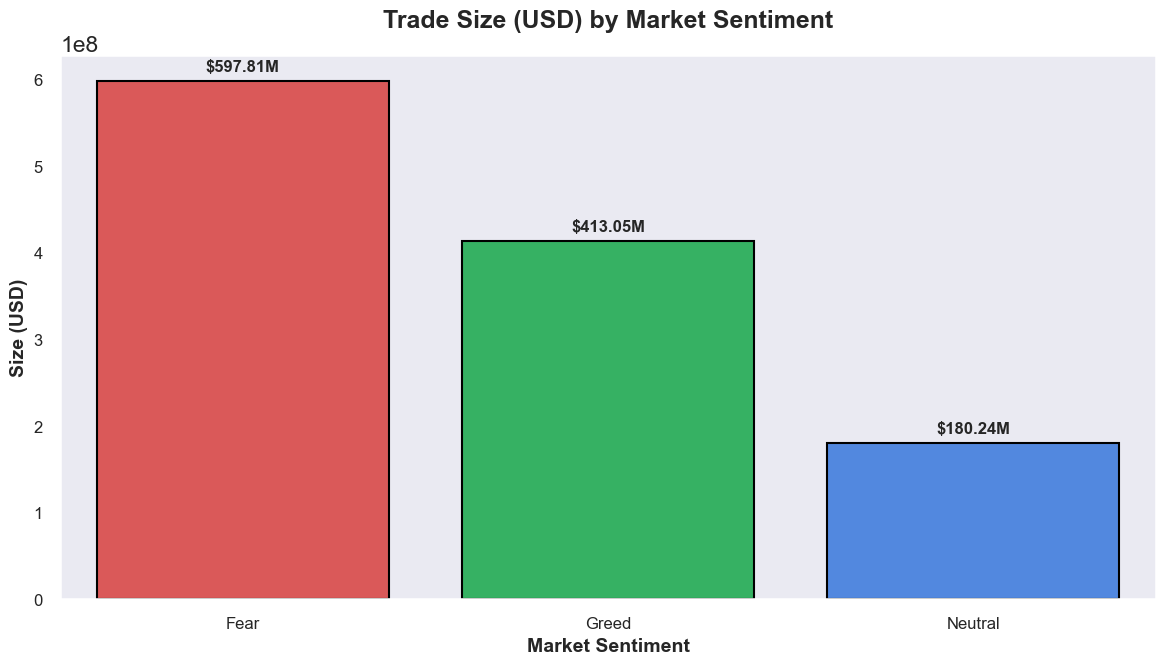

In [413]:
# Create the plot for MEDIAN volume
plt.figure(figsize=(12, 7))
sns.set_style("dark")

# Bar plot
ax = sns.barplot(data=volume_analysis, x='classification', y='sum', 
                 palette=['#ef4444', '#22c55e', '#3b82f6'], edgecolor='black', linewidth=1.5)

# Customize
plt.title('Trade Size (USD) by Market Sentiment', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Market Sentiment', fontsize=14, fontweight='bold')
plt.ylabel('Size (USD)', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add value labels on bars
# Add value labels on bars (in millions)
for container in ax.containers:
    labels = [f"${v/1_000_000:.2f}M" for v in container.datavalues]
    ax.bar_label(container, labels=labels, padding=5,
                 fontsize=12, fontweight='bold')



plt.tight_layout()
save_fig('median_volume_by_sentiment.png')
plt.show()

**Insight:**
- Trading volume is large during fear market compare to greed and neutral.


**Q2: Volume trends over time by sentiment**

In [414]:
#Trading Frequency by Sentiment
freq_by_sentiment = df.groupby('classification').agg({
    'date': lambda x: x.nunique(),  # number of unique days
    'Closed PnL': 'count'  # number of trades
}).reset_index()
freq_by_sentiment = freq_by_sentiment.rename(columns={"classification":"sentiment", "date":"Unique_days", "Closed PnL":"Total_Trades"})
freq_by_sentiment['Trades_per_Day'] = freq_by_sentiment['Total_Trades'] / freq_by_sentiment['Unique_days']
print(freq_by_sentiment)

  sentiment  Unique_days  Total_Trades  Trades_per_Day
0      Fear          105         83237      792.733333
1     Greed          307         90295      294.120521
2   Neutral           67         37686      562.477612


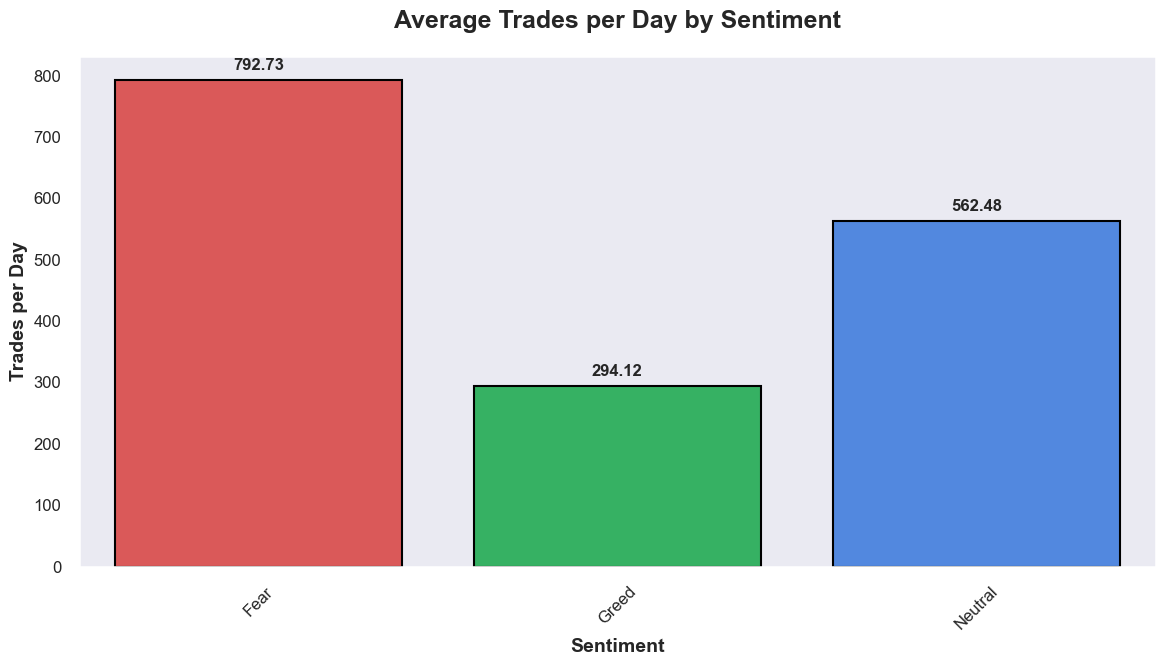

In [415]:
# Set seaborn style
sns.set_style("dark")

plt.figure(figsize=(12, 7))

# Create bar plot using seaborn for consistent styling
ax = sns.barplot(
    x=freq_by_sentiment.index,
    y=freq_by_sentiment['Trades_per_Day'],
    palette=['#ef4444', '#22c55e', '#3b82f6'],
    edgecolor='black',
    linewidth=1.5
)

# Customize styling
plt.title('Average Trades per Day by Sentiment', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Sentiment', fontsize=14, fontweight='bold')
plt.ylabel('Trades per Day', fontsize=14, fontweight='bold')
plt.xticks([0, 1, 2], ['Fear', 'Greed', 'Neutral'], fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Add value labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=5, fontsize=12, fontweight='bold')


plt.tight_layout()
save_fig('trades_per_day_by_sentiment.png')
plt.show()

In [416]:
# Daily volume colored by sentiment
daily_volume = df.groupby(['date', 'classification'])['Size USD'].sum().reset_index()
daily_volume['log_volume'] = np.log1p(daily_volume['Size USD'])


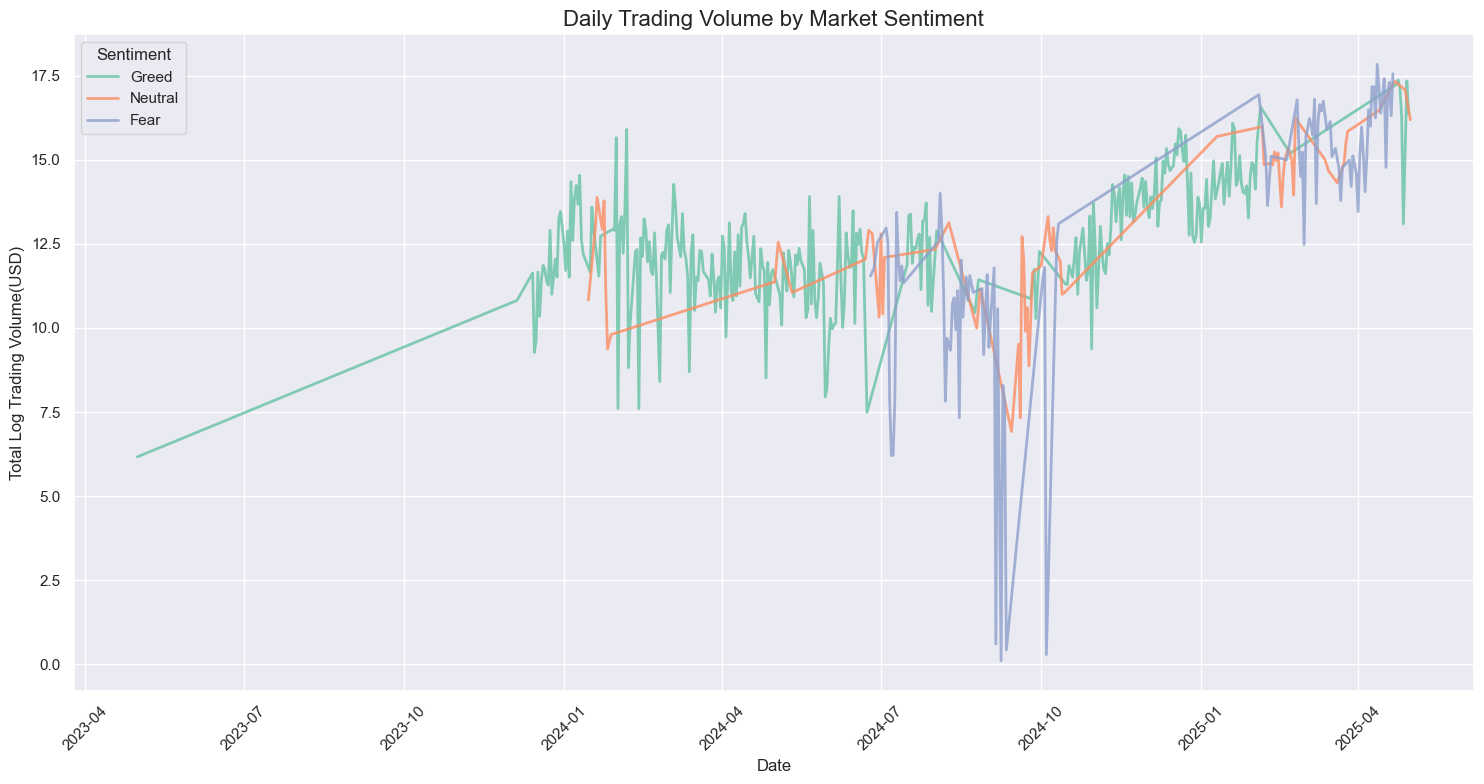

In [417]:
# Set seaborn theme
sns.set_theme(style="darkgrid")

plt.figure(figsize=(15, 8))

sns.lineplot(
    data=daily_volume,
    x='date',
    y='log_volume',
    hue='classification',
    palette='Set2',
    alpha=0.8,
    linewidth=2
)
plt.title('Daily Trading Volume by Market Sentiment', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Log Trading Volume(USD)', fontsize=12)

plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
save_fig("daily_trade_vol.png")
plt.show()


**Insights:**
- There is a clear upward trend in trading volume over time across all sentiments.
- From 2023-04 to 2024-06 the trade volume of  greed so high that it dominated the market.
- Greed sentiment consistently shows higher trading volume compared to Fear and Neutral.
- From 2024-07 the fear dominated most of the time but it is inconsistent.
- Fear drop near to zero during 2024-08 and 2024-10 and massive spike in between that period.


### **Leverage Analysis - How does leverage usage align/diverge with sentiment?**

In [418]:
# ROI per Trade
df['ROI_per_trade'] = (df['Closed PnL'] / df['Size USD']) * 100
df['ROI_per_trade'] = df['ROI_per_trade'].replace([np.inf, -np.inf], np.nan)

print("ROI per Trade Statistics:")
print(df['ROI_per_trade'].describe())
print()

ROI per Trade Statistics:
count    211181.000000
mean          1.899493
std          84.581330
min      -38440.642609
25%           0.000000
50%           0.000000
75%           1.032304
max         340.354950
Name: ROI_per_trade, dtype: float64



In [419]:
roi_by_sentiment = df.groupby('classification').apply(
    lambda x: ((x['Closed PnL'].sum() - x['Fee'].sum()) / x['Size USD'].sum() * 100)
).reset_index(name='ROI')

print("ROI by Sentiment:")
roi_by_sentiment


ROI by Sentiment:


,classification,ROI
0,Fear,0.665751
1,Greed,1.156082
2,Neutral,0.695479


In [420]:
roi_by_contraian = df.groupby('is_contrarian').apply(
    lambda x: ((x['Closed PnL'].sum() - x['Fee'].sum()) / x['Size USD'].sum() * 100)
).reset_index(name='ROI')

print("ROI by Sentiment:")
roi_by_contraian
   

ROI by Sentiment:


,is_contrarian,ROI
0,False,0.547578
1,True,1.251841


In [421]:
roi_by_tradingstyle = df.groupby('trading_style').apply(
    lambda x: ((x['Closed PnL'].sum() - x['Fee'].sum()) / x['Size USD'].sum() * 100)
).reset_index(name='ROI')

print("ROI by Sentiment:")
roi_by_tradingstyle


ROI by Sentiment:


,trading_style,ROI
0,Derivatives Trading,0.629347
1,Others,21.993303
2,Spot Trading,4.725195


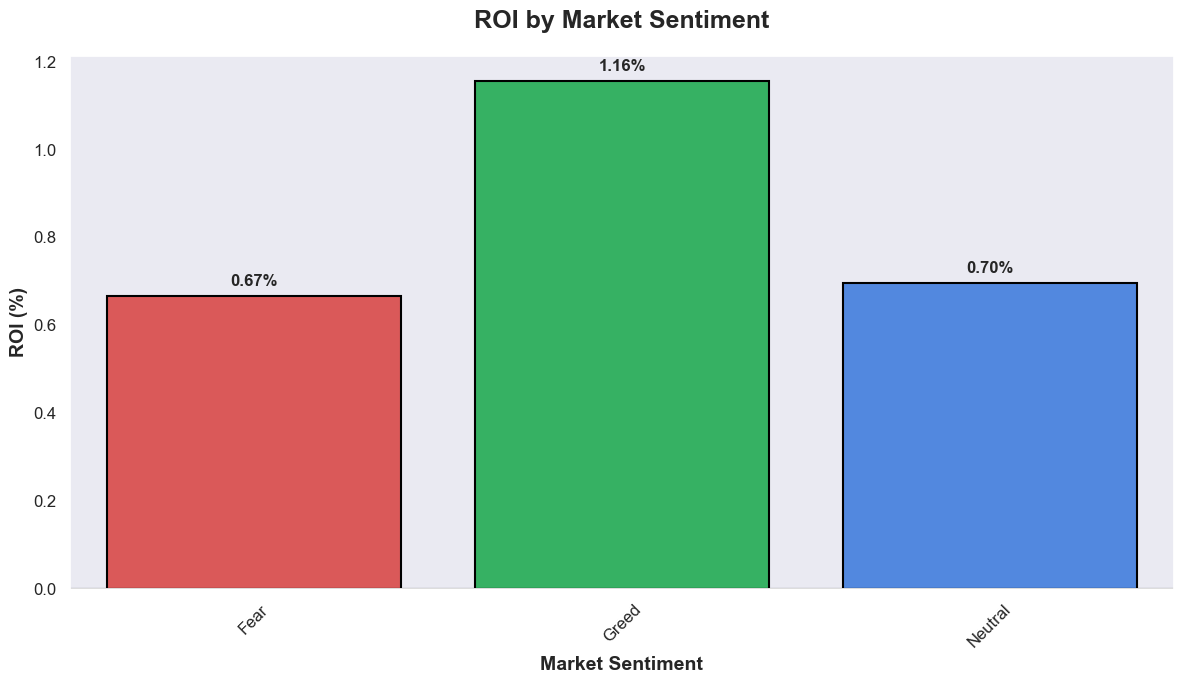

In [422]:

# Set seaborn style
sns.set_style("dark")

plt.figure(figsize=(12, 7))

# Create bar plot using seaborn for consistent styling
ax = sns.barplot(
    data=roi_by_sentiment,
    x='classification',
    y='ROI',
    palette=['#ef4444', '#22c55e', '#3b82f6'],
    edgecolor='black',
    linewidth=1.5
)

# Zero reference line
plt.axhline(0, color='black', linewidth=1.5)

# Customize styling
plt.title('ROI by Market Sentiment', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Market Sentiment', fontsize=14, fontweight='bold')
plt.ylabel('ROI (%)', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Add value labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', padding=5, fontsize=12, fontweight='bold')

plt.tight_layout()
save_fig('roi_by_market_sentiment.png')
plt.show()



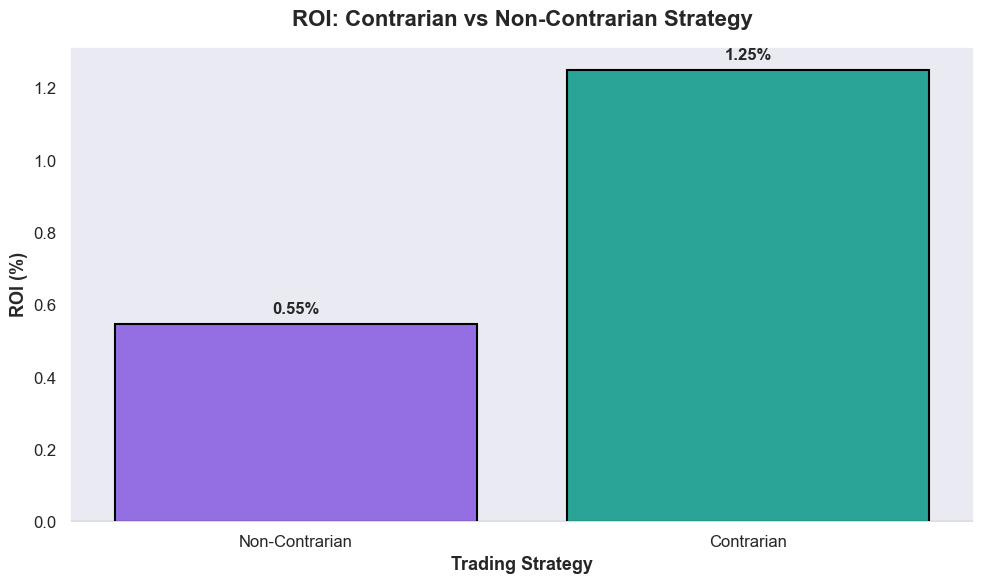

In [423]:
# Set seaborn style
sns.set_style("dark")

plt.figure(figsize=(10, 6))

ax = sns.barplot(
    data=roi_by_contraian,
    x='is_contrarian',
    y='ROI',
    palette=['#8b5cf6', '#14b8a6'],  # Non-contrarian (blue), Contrarian (red)
    edgecolor='black',
    linewidth=1.5
)

# Zero reference line
plt.axhline(0, color='black', linewidth=1.5)

# Titles & labels
plt.title('ROI: Contrarian vs Non-Contrarian Strategy',
          fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Trading Strategy', fontsize=13, fontweight='bold')
plt.ylabel('ROI (%)', fontsize=13, fontweight='bold')

# Custom x-ticks (clear semantics)
plt.xticks(
    ticks=[0, 1],
    labels=['Non-Contrarian', 'Contrarian'],
    fontsize=12
)
plt.yticks(fontsize=12)

# Add value labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', padding=5,
                 fontsize=12, fontweight='bold')

plt.tight_layout()
save_fig("roi_contrarian_vs_non_contrarian.png")
plt.show()



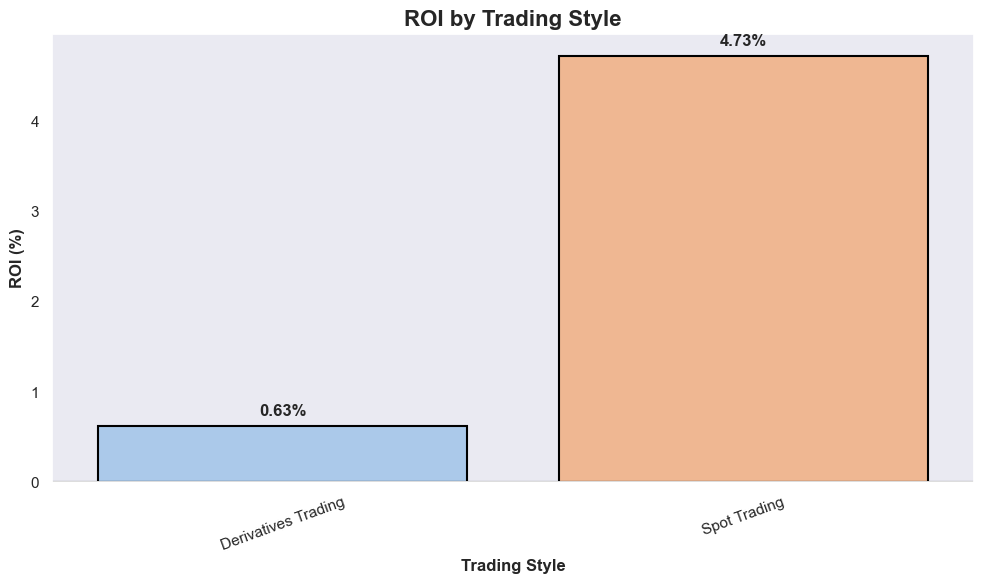

In [424]:
# Remove 'Other' trading style
roi_filtered = roi_by_tradingstyle[roi_by_tradingstyle['trading_style'] != 'Others']

sns.set_style("dark")
plt.figure(figsize=(10, 6))

ax = sns.barplot(
    data=roi_filtered,
    x='trading_style',
    y='ROI',
    palette='pastel',
    edgecolor='black',
    linewidth=1.5
)

plt.axhline(0, color='black', linewidth=1.5)
plt.title('ROI by Trading Style', fontsize=16, fontweight='bold')
plt.xlabel('Trading Style', fontsize=12, fontweight='bold')
plt.ylabel('ROI (%)', fontsize=12, fontweight='bold')

plt.xticks(rotation=20, fontsize=11)
plt.yticks(fontsize=11)
# Add value labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', padding=5,
                 fontsize=12, fontweight='bold')

plt.tight_layout()
save_fig('trading_style_roi.png')
plt.show()


**Insights:**
- Trades executed during greed-driven markets outperform fear and neutral conditions.
- Contrarian trades deliver more than 2× the ROI of non-contrarian trades.
- Spot trading is significantly more profitable than derivatives.
